In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from uncertainties import ufloat

In [2]:
def weird_law(k_l, k_s, t0_l, t0_s, I_l, I_s):
    return t0_s, (I_s / I_l) ** (1 / (2*k_s))

In [22]:
def weird_law_2(k_l, k_s, t0_l, t0_s, I_l, I_s):
    alpha = (t0_s) / ((t0_l) ** ((I_s / I_l)**(1 / (2*k_s))))
    beta = (I_s / I_l) ** (1 / (2*k_s))
    return alpha, beta

In [5]:
k_l = 1 / (2 * 2.94)
I_l = 108
t0_l = 10**1.1

k_s = 1 / (2 * 3.03)
I_s = 208
t0_s = 10**(-1.9)

In [25]:
k_l = 1 / (2 * ufloat(2.94, 0.08))
I_l = ufloat(108, 25)
t0_l = 10**ufloat(1.1, 0.3)

k_s = 1 / (2 * ufloat(3.03, 0.07))
I_s = ufloat(208, 28)
t0_s = 10**(ufloat(-1.9, 0.3))

In [28]:
k_l

0.17006802721088435+/-0.0046277014207043365

In [29]:
weird_law(k_l, k_s, t0_l, t0_s, I_l, I_s)

(0.012589254117941675+/-0.008696348659165921,
 7.285475898417132+/-5.920636324642028)

In [27]:
weird_law_2(k_l, k_s, t0_l, t0_s, I_l, I_s)

(1.2189236732219725e-10+/-1.929929634224359e-09,
 7.285475898417132+/-5.920636324642028)

In [30]:
with open("quick_fit_dump.pkl", "rb") as f:
    sigma_sample, T_s, T_l = pickle.load(f)

In [53]:
sigma_fit_samples_loss = np.arange(5.0, 7.0, 0.1)
sigma_fit_samples = np.arange(4.0, 6.0, 0.1)

sigma_best_s_idx = 8
sigma_best_l_idx = 12

sigma_best_s = sigma_fit_samples_loss[sigma_best_s_idx]
sigma_best_l = sigma_fit_samples[sigma_best_l_idx]

general_sigma = max(sigma_best_s, sigma_best_l)
larger_sigma = min(sigma_best_s, sigma_best_l)

mask = sigma_sample >= general_sigma
larger_mask = sigma_sample >= larger_sigma

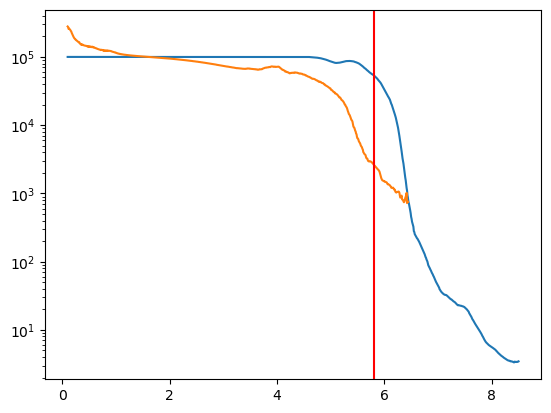

In [35]:
plt.plot(sigma_sample, T_s)
plt.plot(sigma_sample, T_l)

plt.axvline(sigma_best_s, color="red")
plt.yscale("log")

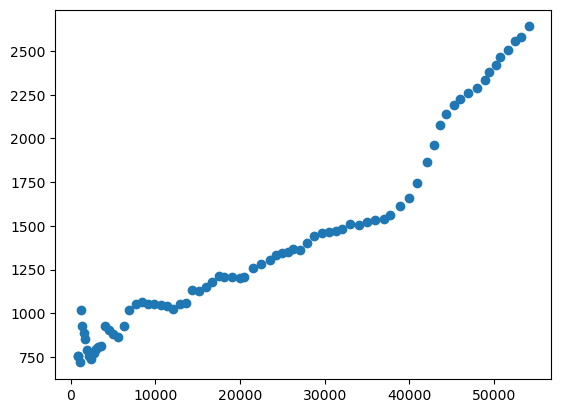

In [36]:
mask = sigma_sample >= general_sigma
plt.plot(T_s[mask], T_l[mask], "o")

In [46]:
def nek_law(x, k, t_0, I):
    val = np.asarray(t_0.n * np.exp((np.sqrt(I.n)/x)**(1/(2*k.n))))
    return val

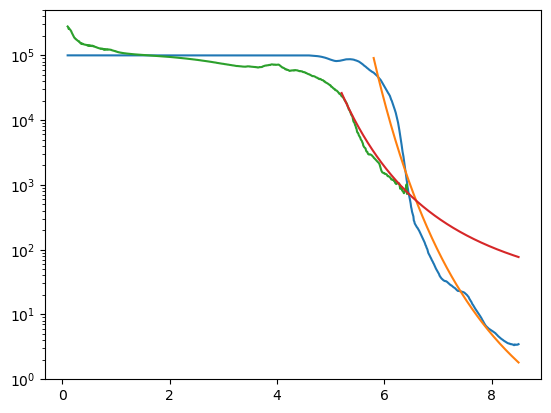

In [54]:
plt.plot(sigma_sample, T_s)
plt.plot(sigma_sample[mask], nek_law(sigma_sample[mask], k_s, t0_s, I_s))
plt.plot(sigma_sample, T_l)
plt.plot(sigma_sample[larger_mask], nek_law(sigma_sample[larger_mask], k_l, t0_l, I_l))
plt.yscale("log")

In [44]:
 nek_law(sigma_sample[mask], k_s, t0_s, I_s)

array([2.66855132e+106, 3.01710464e+105, 3.48762511e+104, 4.12080706e+103,
       4.97551146e+102, 6.13744309e+101, 7.73257718e+100, 9.94814758e+099,
       1.30658253e+099, 1.75147924e+098, 2.39576847e+097, 3.34315020e+096,
       4.75815860e+095, 6.90551348e+094, 1.02171647e+094, 1.54080160e+093,
       2.36783115e+092, 3.70722887e+091, 5.91222414e+090, 9.60206275e+089,
       1.58781841e+089, 2.67283034e+088, 4.57919315e+087, 7.98302323e+086,
       1.41586427e+086, 2.55427504e+085, 4.68621901e+084, 8.74187318e+083,
       1.65780164e+083, 3.19541255e+082, 6.25905509e+081, 1.24566204e+081,
       2.51839836e+080, 5.17136809e+079, 1.07837132e+079, 2.28317409e+078,
       4.90732058e+077, 1.07056325e+077, 2.37012591e+076, 5.32416202e+075,
       1.21333943e+075, 2.80476101e+074, 6.57542863e+073, 1.56314734e+073,
       3.76753427e+072, 9.20514389e+071, 2.27958322e+071, 5.72094850e+070,
       1.45480685e+070, 3.74804777e+069, 9.78151005e+068, 2.58551449e+068,
       6.92099196e+067, 1

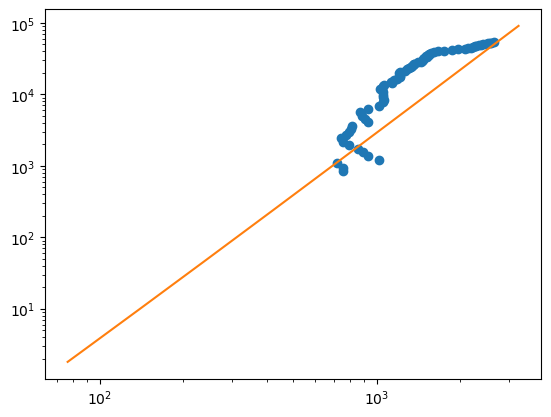

In [64]:
mask = sigma_sample >= general_sigma
plt.plot(T_l[mask], T_s[mask], "o")
plt.plot(nek_law(sigma_sample[mask], k_l, t0_l, I_l), nek_law(sigma_sample[mask], k_s, t0_s, I_s))

plt.yscale("log")
plt.xscale("log")

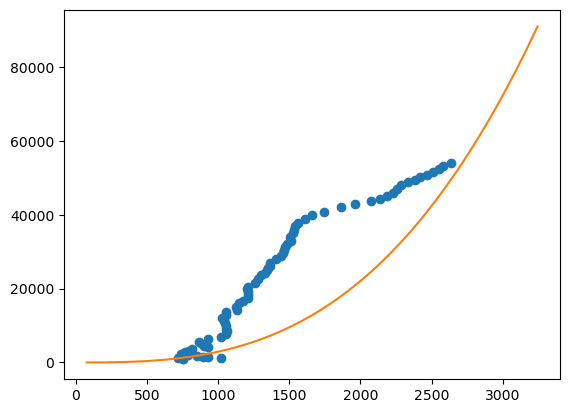

In [65]:
mask = sigma_sample >= general_sigma
plt.plot(T_l[mask], T_s[mask], "o")
plt.plot(nek_law(sigma_sample[mask], k_l, t0_l, I_l), nek_law(sigma_sample[mask], k_s, t0_s, I_s))

# plt.yscale("log")
# plt.xscale("log")

In [60]:
import lmfit

def resid_polynomial(params, x, data=None):
    alpha = params["alpha"]
    beta = params["beta"]

    model = np.log10(alpha) + beta * np.log10(x)

    if data is None:
        return 10**model
    return (model - np.log10(data))


params = lmfit.Parameters()
params.add("alpha", value=1.0, min=0.0)
params.add("beta", value=1.0, min=0.0)

out = lmfit.minimize(resid_polynomial, params, args=(nek_law(sigma_sample[mask], k_l, t0_l, I_l), nek_law(sigma_sample[mask], k_s, t0_s, I_s)))

In [61]:
out

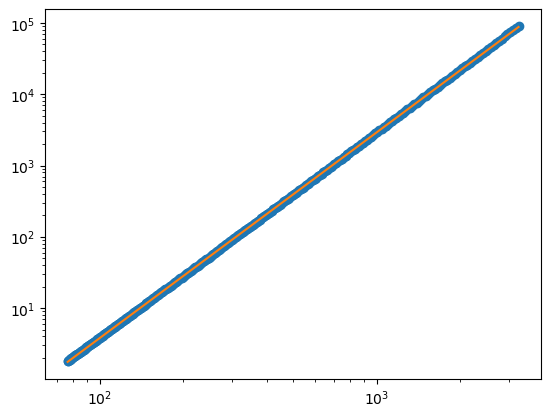

In [63]:
plt.plot(nek_law(sigma_sample[mask], k_l, t0_l, I_l), nek_law(sigma_sample[mask], k_s, t0_s, I_s), "o")
plt.plot(nek_law(sigma_sample[mask], k_l, t0_l, I_l), resid_polynomial(out.params, nek_law(sigma_sample[mask], k_l, t0_l, I_l)))

plt.yscale("log")
plt.xscale("log")

In [66]:
import pickle
sigma_fit_samples_loss = np.arange(5.0, 7.0, 0.1)
sigma_fit_samples = np.arange(4.0, 6.0, 0.1)
sigma_fit_samples_bad_loss_bad = np.arange(4.0, 6.0, 0.1)
sigma_fit_samples_bad = np.arange(3.0, 5.0, 0.1)

with open("loss_fit_results_bad_all.pkl", "rb") as f:
    loss_fit_results_bad_all = pickle.load(f)

with open("lyap_list_result_bad_all.pkl", "rb") as f:
    lyap_list_result_bad_all = pickle.load(f)

with open("loss_fit_results_all.pkl", "rb") as f:
    loss_fit_results_all = pickle.load(f)

with open("lyap_list_result_all.pkl", "rb") as f:
    lyap_list_result_all = pickle.load(f)

In [73]:
from uncertainties import ufloat

k_vals_s = {seed : {z:0 for z in [0.0, 0.15, 0.3]} for seed in ["best", "worst"]}
t0_vals_s = {seed : {z:0 for z in [0.0, 0.15, 0.3]} for seed in ["best", "worst"]}
sig0_vals_s = {seed : {z:0 for z in [0.0, 0.15, 0.3]} for seed in ["best", "worst"]}
redchi_vals_s = {seed : {z:0 for z in [0.0, 0.15, 0.3]} for seed in ["best", "worst"]}
sigma_pos_vals_s = {seed : {z:0 for z in [0.0, 0.15, 0.3]} for seed in ["best", "worst"]}

k_vals_s["best"][0.0] = ufloat(loss_fit_results_all[0][8].params["b"].value, loss_fit_results_all[0][8].params["b"].stderr)
k_vals_s["best"][0.15] = ufloat(loss_fit_results_all[1][8].params["b"].value, loss_fit_results_all[1][8].params["b"].stderr)
k_vals_s["best"][0.3] = ufloat(loss_fit_results_all[2][8].params["b"].value, loss_fit_results_all[2][8].params["b"].stderr)

t0_vals_s["best"][0.0] = ufloat(loss_fit_results_all[0][8].params["t_0"].value, loss_fit_results_all[0][8].params["t_0"].stderr)
t0_vals_s["best"][0.15] = ufloat(loss_fit_results_all[1][8].params["t_0"].value, loss_fit_results_all[1][8].params["t_0"].stderr)
t0_vals_s["best"][0.3] = ufloat(loss_fit_results_all[2][8].params["t_0"].value, loss_fit_results_all[2][8].params["t_0"].stderr)

sig0_vals_s["best"][0.0] = ufloat(loss_fit_results_all[0][8].params["sig_0"].value, loss_fit_results_all[0][8].params["sig_0"].stderr)**2
sig0_vals_s["best"][0.15] = ufloat(loss_fit_results_all[1][8].params["sig_0"].value, loss_fit_results_all[1][8].params["sig_0"].stderr)**2
sig0_vals_s["best"][0.3] = ufloat(loss_fit_results_all[2][8].params["sig_0"].value, loss_fit_results_all[2][8].params["sig_0"].stderr)**2

redchi_vals_s["best"][0.0] = loss_fit_results_all[0][8].redchi
redchi_vals_s["best"][0.15] = loss_fit_results_all[1][8].redchi
redchi_vals_s["best"][0.3] = loss_fit_results_all[2][8].redchi

k_vals_s["worst"][0.0] = ufloat(loss_fit_results_bad_all[0][7].params["b"].value, loss_fit_results_bad_all[0][7].params["b"].stderr)
k_vals_s["worst"][0.15] = ufloat(loss_fit_results_bad_all[1][6].params["b"].value, loss_fit_results_bad_all[1][6].params["b"].stderr)
k_vals_s["worst"][0.3] = ufloat(loss_fit_results_bad_all[2][6].params["b"].value, loss_fit_results_bad_all[2][6].params["b"].stderr)

t0_vals_s["worst"][0.0] = ufloat(loss_fit_results_bad_all[0][7].params["t_0"].value, loss_fit_results_bad_all[0][7].params["t_0"].stderr)
t0_vals_s["worst"][0.15] = ufloat(loss_fit_results_bad_all[1][6].params["t_0"].value, loss_fit_results_bad_all[1][6].params["t_0"].stderr)
t0_vals_s["worst"][0.3] = ufloat(loss_fit_results_bad_all[2][6].params["t_0"].value, loss_fit_results_bad_all[2][6].params["t_0"].stderr)

sig0_vals_s["worst"][0.0] = ufloat(loss_fit_results_bad_all[0][7].params["sig_0"].value, loss_fit_results_bad_all[0][7].params["sig_0"].stderr)**2
sig0_vals_s["worst"][0.15] = ufloat(loss_fit_results_bad_all[1][6].params["sig_0"].value, loss_fit_results_bad_all[1][6].params["sig_0"].stderr)**2
sig0_vals_s["worst"][0.3] = ufloat(loss_fit_results_bad_all[2][6].params["sig_0"].value, loss_fit_results_bad_all[2][6].params["sig_0"].stderr)**2

redchi_vals_s["worst"][0.0] = loss_fit_results_bad_all[0][7].redchi
redchi_vals_s["worst"][0.15] = loss_fit_results_bad_all[1][6].redchi
redchi_vals_s["worst"][0.3] = loss_fit_results_bad_all[2][6].redchi

sigma_pos_vals_s["best"][0.0] = sigma_fit_samples_loss[8]
sigma_pos_vals_s["best"][0.15] = sigma_fit_samples_loss[8]
sigma_pos_vals_s["best"][0.3] = sigma_fit_samples_loss[8]

sigma_pos_vals_s["worst"][0.0] = sigma_fit_samples_bad_loss_bad[7]
sigma_pos_vals_s["worst"][0.15] = sigma_fit_samples_bad_loss_bad[6]
sigma_pos_vals_s["worst"][0.3] = sigma_fit_samples_bad_loss_bad[6]

In [74]:
from uncertainties import ufloat

k_vals_l = {seed : {z:0 for z in [0.0, 0.15, 0.3]} for seed in ["best", "worst"]}
t0_vals_l = {seed : {z:0 for z in [0.0, 0.15, 0.3]} for seed in ["best", "worst"]}
sig0_vals_l = {seed : {z:0 for z in [0.0, 0.15, 0.3]} for seed in ["best", "worst"]}
redchi_vals_l = {seed : {z:0 for z in [0.0, 0.15, 0.3]} for seed in ["best", "worst"]}
sigma_pos_vals_l = {seed : {z:0 for z in [0.0, 0.15, 0.3]} for seed in ["best", "worst"]}


k_vals_l["best"][0.0] = ufloat(lyap_list_result_all[0][-3].params["b"].value, lyap_list_result_all[0][-3].params["b"].stderr)
k_vals_l["best"][0.15] = ufloat(lyap_list_result_all[1][12].params["b"].value, lyap_list_result_all[1][12].params["b"].stderr)
k_vals_l["best"][0.3] = ufloat(lyap_list_result_all[2][7].params["b"].value, lyap_list_result_all[2][7].params["b"].stderr)

t0_vals_l["best"][0.0] = ufloat(lyap_list_result_all[0][-3].params["t_0"].value, lyap_list_result_all[0][-3].params["t_0"].stderr)
t0_vals_l["best"][0.15] = ufloat(lyap_list_result_all[1][12].params["t_0"].value, lyap_list_result_all[1][12].params["t_0"].stderr)
t0_vals_l["best"][0.3] = ufloat(lyap_list_result_all[2][7].params["t_0"].value, lyap_list_result_all[2][7].params["t_0"].stderr)

sig0_vals_l["best"][0.0] = ufloat(lyap_list_result_all[0][-3].params["sig_0"].value, lyap_list_result_all[0][-3].params["sig_0"].stderr)**2
sig0_vals_l["best"][0.15] = ufloat(lyap_list_result_all[1][12].params["sig_0"].value, lyap_list_result_all[1][12].params["sig_0"].stderr)**2
sig0_vals_l["best"][0.3] = ufloat(lyap_list_result_all[2][7].params["sig_0"].value, lyap_list_result_all[2][7].params["sig_0"].stderr)**2

redchi_vals_l["best"][0.0] = lyap_list_result_all[0][-3].redchi
redchi_vals_l["best"][0.15] = lyap_list_result_all[1][12].redchi
redchi_vals_l["best"][0.3] = lyap_list_result_all[2][7].redchi

k_vals_l["worst"][0.0] = ufloat(lyap_list_result_bad_all[0][-2].params["b"].value, lyap_list_result_bad_all[0][-2].params["b"].stderr)
k_vals_l["worst"][0.15] = ufloat(lyap_list_result_bad_all[1][5].params["b"].value, lyap_list_result_bad_all[1][5].params["b"].stderr)
k_vals_l["worst"][0.3] = ufloat(lyap_list_result_bad_all[2][4].params["b"].value, lyap_list_result_bad_all[2][4].params["b"].stderr)

t0_vals_l["worst"][0.0] = ufloat(lyap_list_result_bad_all[0][-2].params["t_0"].value, lyap_list_result_bad_all[0][-2].params["t_0"].stderr)
t0_vals_l["worst"][0.15] = ufloat(lyap_list_result_bad_all[1][5].params["t_0"].value, lyap_list_result_bad_all[1][5].params["t_0"].stderr)
t0_vals_l["worst"][0.3] = ufloat(lyap_list_result_bad_all[2][4].params["t_0"].value, lyap_list_result_bad_all[2][4].params["t_0"].stderr)

sig0_vals_l["worst"][0.0] = ufloat(lyap_list_result_bad_all[0][-2].params["sig_0"].value, lyap_list_result_bad_all[0][-2].params["sig_0"].stderr)**2
sig0_vals_l["worst"][0.15] = ufloat(lyap_list_result_bad_all[1][5].params["sig_0"].value, lyap_list_result_bad_all[1][5].params["sig_0"].stderr)**2
sig0_vals_l["worst"][0.3] = ufloat(lyap_list_result_bad_all[2][4].params["sig_0"].value, lyap_list_result_bad_all[2][4].params["sig_0"].stderr)**2

redchi_vals_l["worst"][0.0] = lyap_list_result_bad_all[0][-2].redchi
redchi_vals_l["worst"][0.15] = lyap_list_result_bad_all[1][5].redchi
redchi_vals_l["worst"][0.3] = lyap_list_result_bad_all[2][4].redchi

sigma_pos_vals_l["best"][0.0] = sigma_fit_samples[-3]
sigma_pos_vals_l["best"][0.15] = sigma_fit_samples[12]
sigma_pos_vals_l["best"][0.3] = sigma_fit_samples[7]

sigma_pos_vals_l["worst"][0.0] = sigma_fit_samples_bad[-2]
sigma_pos_vals_l["worst"][0.15] = sigma_fit_samples_bad[5]
sigma_pos_vals_l["worst"][0.3] = sigma_fit_samples_bad[4]


In [81]:
sigma_pos_max = {seed : {z:0.0 for z in [0.0, 0.15, 0.3]} for seed in ["best", "worst"]}
sigma_pos_min = {seed : {z:0.0 for z in [0.0, 0.15, 0.3]} for seed in ["best", "worst"]}

for seed in ["best", "worst"]:
    for z in [0.0, 0.15, 0.3]:
        sigma_pos_max[seed][z] = max(sigma_pos_vals_l[seed][z], sigma_pos_vals_s[seed][z])
        sigma_pos_min[seed][z] = min(sigma_pos_vals_l[seed][z], sigma_pos_vals_s[seed][z])


In [67]:
with open("quick_fit_dump_2.pkl", "rb") as f:
    sigma_sample, T_s_list, T_l_list = pickle.load(f)

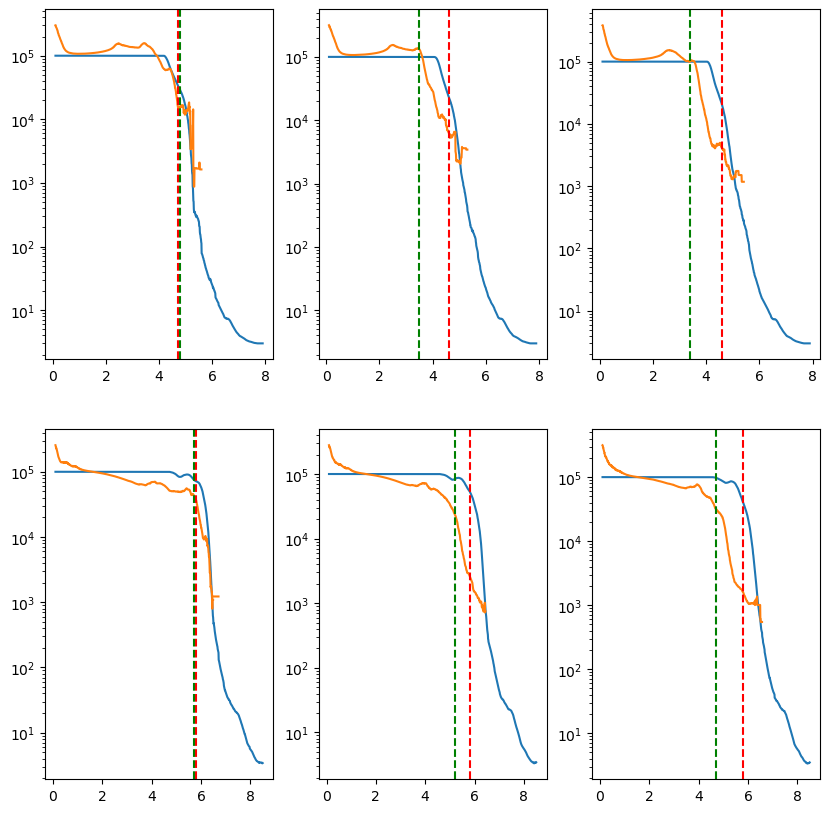

In [75]:
fig = plt.figure(figsize=(10, 10))

gs = fig.add_gridspec(2, 3)

axs = gs.subplots()

for i, j, zeta in zip(range(0, 3), range(0, 3), [0.0, 0.15, 0.3]):
    axs[0, i].plot(sigma_sample, T_s_list[j], label="loss")
    axs[0, i].plot(sigma_sample, T_l_list[j], label="loss")

    axs[0, i].axvline(sigma_pos_vals_s["worst"][zeta], color="red", linestyle="--")
    axs[0, i].axvline(sigma_pos_vals_l["worst"][zeta], color="green", linestyle="--")

    axs[0, i].set_yscale("log")

for i, j, zeta in zip(range(0, 3), range(6, 9), [0.0, 0.15, 0.3]):
    axs[1, i].plot(sigma_sample, T_s_list[j], label="loss")
    axs[1, i].plot(sigma_sample, T_l_list[j], label="loss")

    axs[1, i].axvline(sigma_pos_vals_s["best"][zeta], color="red", linestyle="--")
    axs[1, i].axvline(sigma_pos_vals_l["best"][zeta], color="green", linestyle="--")

    axs[1, i].set_yscale("log")

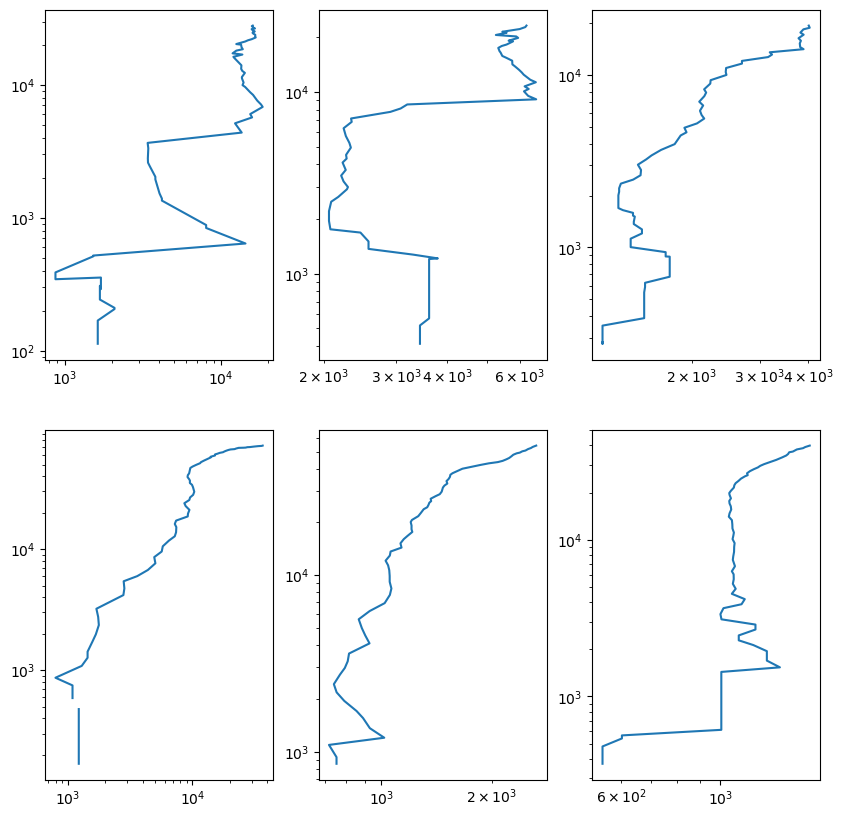

In [85]:
fig = plt.figure(figsize=(10, 10))

gs = fig.add_gridspec(2, 3)

axs = gs.subplots()

for i, j, zeta in zip(range(0, 3), range(0, 3), [0.0, 0.15, 0.3]):
    mask  = sigma_sample > sigma_pos_max["worst"][zeta]
    axs[0, i].plot(T_l_list[j][mask], T_s_list[j][mask], label="loss")

    axs[0, i].set_yscale("log")
    axs[0, i].set_xscale("log")

for i, j, zeta in zip(range(0, 3), range(6, 9), [0.0, 0.15, 0.3]):
    mask  = sigma_sample > sigma_pos_max["best"][zeta]
    axs[1, i].plot(T_l_list[j][mask], T_s_list[j][mask], label="loss")

    axs[1, i].set_yscale("log")
    axs[1, i].set_xscale("log")

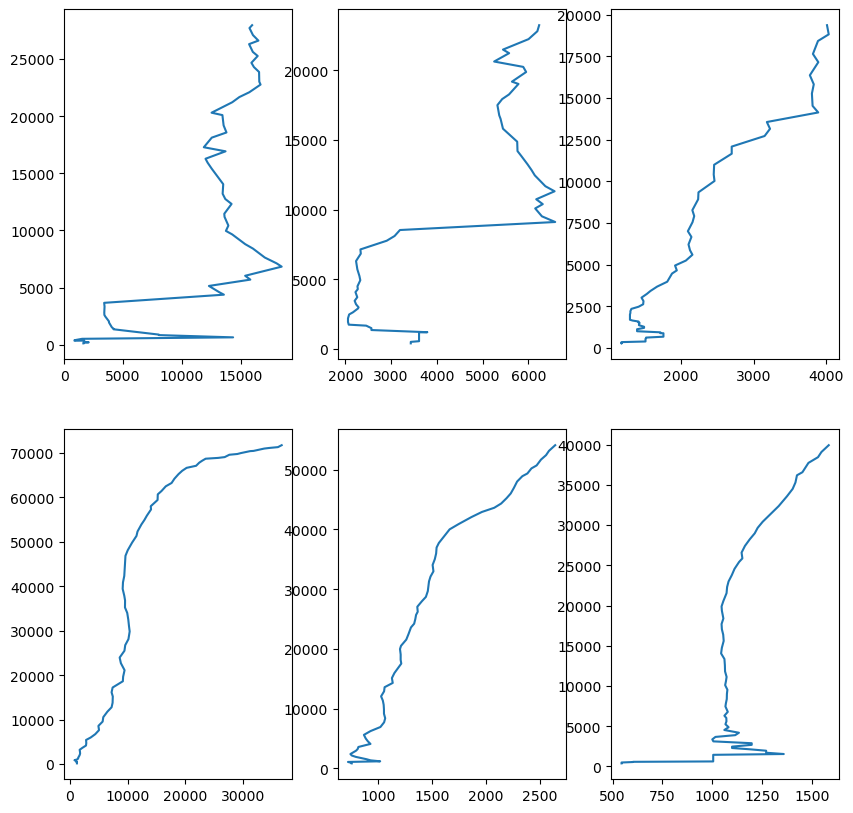

In [86]:
fig = plt.figure(figsize=(10, 10))

gs = fig.add_gridspec(2, 3)

axs = gs.subplots()

for i, j, zeta in zip(range(0, 3), range(0, 3), [0.0, 0.15, 0.3]):
    mask  = sigma_sample > sigma_pos_max["worst"][zeta]
    axs[0, i].plot(T_l_list[j][mask], T_s_list[j][mask], label="loss")

    # axs[0, i].set_yscale("log")
    # axs[0, i].set_xscale("log")

for i, j, zeta in zip(range(0, 3), range(6, 9), [0.0, 0.15, 0.3]):
    mask  = sigma_sample > sigma_pos_max["best"][zeta]
    axs[1, i].plot(T_l_list[j][mask], T_s_list[j][mask], label="loss")

    # axs[1, i].set_yscale("log")
    # axs[1, i].set_xscale("log")

In [170]:
import lmfit

def resid_polynomial(params, x, data=None):
    alpha = params["alpha"]
    beta = params["beta"]

    model = np.log10(alpha) + beta * np.log10(x)

    if data is None:
        return 10**model

    return (model - np.log10(data))

poly_fit_list = []
x_list = []
y_list = []

for seed in ["worst", "best"]:
    for z in [0.0, 0.15, 0.3]:
        params = lmfit.Parameters()
        params.add("alpha", value=10.0, min=0.0)
        params.add("beta", value=10.0, min=0.0)

        idx = (6 if seed == "best" else 0) + (0 if z == 0.0 else (1 if z == 0.15 else 2))
        print(idx, seed, z)

        mask  = sigma_sample > sigma_pos_max[seed][z]
        nanmask = np.logical_and(~np.isnan(T_l_list[idx]), ~np.isnan(T_s_list[idx]))
        total_mask = np.logical_and(mask, nanmask)

        x = T_l_list[idx][total_mask]
        y = T_s_list[idx][total_mask]

        out = lmfit.minimize(resid_polynomial, params, args=(x, y), method="nelder", tol=1e-12)

        poly_fit_list.append(out)
        x_list.append(x)
        y_list.append(y)

0 worst 0.0
1 worst 0.15
2 worst 0.3
6 best 0.0
7 best 0.15
8 best 0.3


In [169]:
lmfit.minimize(resid_polynomial, params, args=(x, y), method="nelder", tol=1e-12)

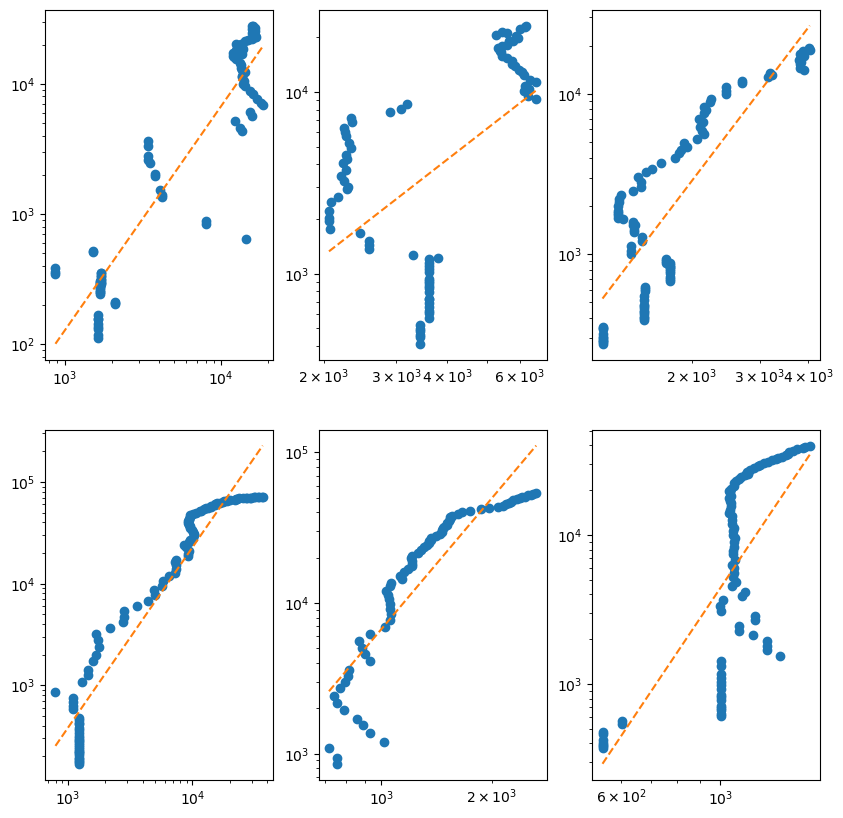

In [171]:
fig = plt.figure(figsize=(10, 10))

gs = fig.add_gridspec(2, 3)

axs = gs.subplots().flatten()

for out, x, y, ax in zip(poly_fit_list, x_list, y_list, axs):
    ax.plot(x, y, "o")
    ax.plot(sorted(x), resid_polynomial(out.params, sorted(x)), "--")

    ax.set_yscale("log")
    ax.set_xscale("log")

In [172]:
import lmfit

def resid_peculiar(params, x, data=None):
    alpha = params["alpha"]
    beta = params["beta"]
    ratio = params["ratio"]
    t_0l = params["t_0l"]

    model = np.log10(alpha) + beta * np.log10(x / t_0l)**ratio
    if np.any(np.isnan(model)):
        print("NAN with the following")
        print("alpha", alpha.value)
        print("beta", beta.value)
        print("ratio", ratio.value)
        print("t_0l", t_0l.value)

    if data is None:
        return 10**model

    return (model - np.log10(data))

peculiar_fit_list = []
x_list = []
y_list = []

for seed in ["worst", "best"]:
    for z in [0.0, 0.15, 0.3]:
        params = lmfit.Parameters()
        params.add("alpha", value=10.0, min=0.0)
        params.add("beta", value=10.0, min=0.0)

        idx = (6 if seed == "best" else 0) + (0 if z == 0.0 else (1 if z == 0.15 else 2))

        k_s = 1 / (2 * k_vals_s[seed][z].n)
        k_l = 1 / (2 * k_vals_l[seed][z].n)

        params.add("ratio", value=k_l / k_s, vary=False)
        params.add("t_0l", value=10**t0_vals_l[seed][z].n, vary=False)

        print(idx, seed, z)

        mask  = sigma_sample > sigma_pos_max[seed][z]
        nanmask = np.logical_and(~np.isnan(T_l_list[idx]), ~np.isnan(T_s_list[idx]))
        total_mask = np.logical_and(mask, nanmask)

        x = T_l_list[idx][total_mask]
        y = T_s_list[idx][total_mask]

        out = lmfit.minimize(resid_peculiar, params, args=(x, y), method="nelder", tol=1e-12)

        peculiar_fit_list.append(out)
        x_list.append(x)
        y_list.append(y)

0 worst 0.0
1 worst 0.15
2 worst 0.3
6 best 0.0
7 best 0.15
8 best 0.3


In [173]:
ludicrous_fit_list = []
x_list = []
y_list = []

for seed in ["worst", "best"]:
    for z in [0.0, 0.15, 0.3]:

        idx = (6 if seed == "best" else 0) + (0 if z == 0.0 else (1 if z == 0.15 else 2))
        fit_idx = (3 if seed == "best" else 0) + (0 if z == 0.0 else (1 if z == 0.15 else 2))

        k_s = 1 / (2 * k_vals_s[seed][z].n)
        k_l = 1 / (2 * k_vals_l[seed][z].n)

        print(idx, seed, z)

        mask  = sigma_sample > sigma_pos_max[seed][z]
        nanmask = np.logical_and(~np.isnan(T_l_list[idx]), ~np.isnan(T_s_list[idx]))
        total_mask = np.logical_and(mask, nanmask)

        x = T_l_list[idx][total_mask]
        y = T_s_list[idx][total_mask]

        params = lmfit.Parameters()

        params.add("alpha", value=peculiar_fit_list[fit_idx].params["alpha"].value, min=0.0)
        params.add("beta", value=peculiar_fit_list[fit_idx].params["beta"].value, min=0.0)

        params.add("ratio", value=k_l / k_s, vary=True, min=0.0)
        params.add("t_0l", value=10**t0_vals_l[seed][z].n, vary=True, min=0.0, max=np.min(x))

        out = lmfit.minimize(resid_peculiar, params, args=(x, y), method="nelder", tol=1e-12)

        ludicrous_fit_list.append(out)
        x_list.append(x)
        y_list.append(y)

0 worst 0.0
1 worst 0.15
2 worst 0.3
6 best 0.0
7 best 0.15
8 best 0.3


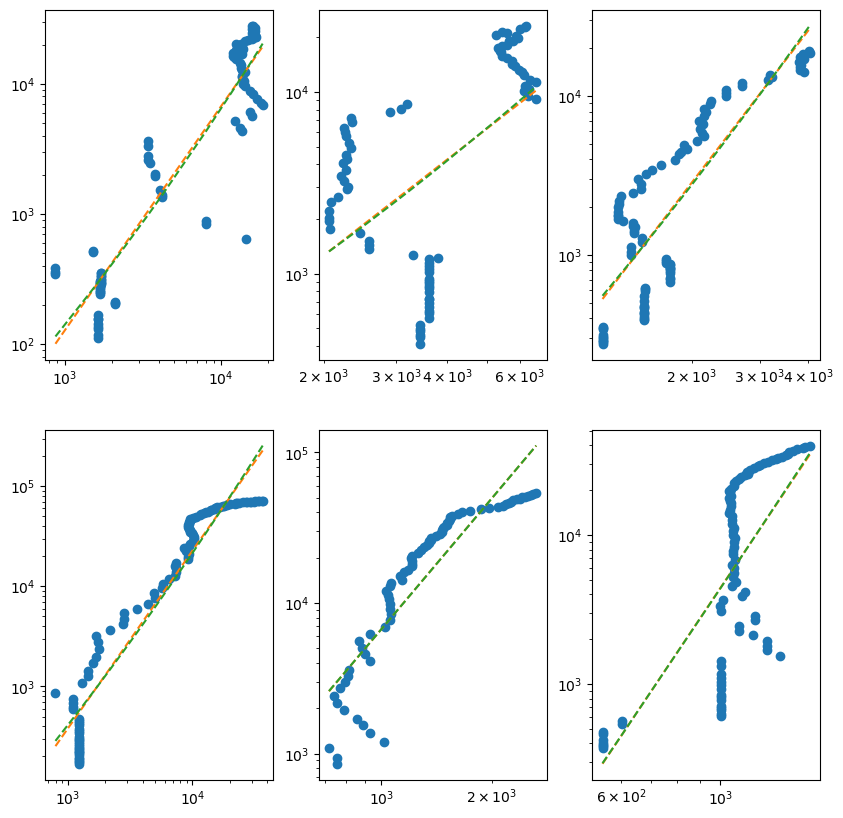

In [184]:
fig = plt.figure(figsize=(10, 10))

gs = fig.add_gridspec(2, 3)

axs = gs.subplots().flatten()

for out, x, y, ax in zip(poly_fit_list, x_list, y_list, axs):
    ax.plot(x, y, "o")
    ax.plot(sorted(x), resid_polynomial(out.params, sorted(x)), "--")

    ax.set_yscale("log")
    ax.set_xscale("log")

for out, x, y, ax in zip(peculiar_fit_list, x_list, y_list, axs):
    ax.plot(sorted(x), resid_peculiar(out.params, np.asarray(sorted(x))), "--")

# for out, x, y, ax in zip(ludicrous_fit_list, x_list, y_list, axs):
#     ax.plot(sorted(x), resid_peculiar(out.params, np.asarray(sorted(x))), "--")

In [175]:
for out_poly, out_pec in zip(poly_fit_list, peculiar_fit_list):
    print(out_poly.chisqr, out_pec.chisqr)
    if out_poly.chisqr < out_pec.chisqr:
        print("poly")
    else:
        print("peculiar")

8.839838792033877 8.768763468678712
peculiar
19.36987475396859 18.978757821436847
peculiar
9.36144559603923 9.484928508583959
poly
7.790751970116122 8.717249334308935
poly
4.275478712936111 4.29053221602245
poly
20.03241799345444 19.992231476686293
peculiar


In [176]:
for out_poly, out_pec, out_lud in zip(poly_fit_list, peculiar_fit_list, ludicrous_fit_list):
    print(out_poly.chisqr, out_pec.chisqr, out_lud.chisqr)
    if out_poly.chisqr < out_pec.chisqr and out_poly.chisqr < out_lud.chisqr:
        print("poly")
    elif out_pec.chisqr < out_poly.chisqr and out_pec.chisqr < out_lud.chisqr:
        print("peculiar")
    else:
        print("ludicrous")

8.839838792033877 8.768763468678712 8.574233161830596
ludicrous
19.36987475396859 18.978757821436847 12.465573917707015
ludicrous
9.36144559603923 9.484928508583959 9.385231590191866
poly
7.790751970116122 8.717249334308935 8.112032088387624
poly
4.275478712936111 4.29053221602245 2.29720809849849
ludicrous
20.03241799345444 19.992231476686293 19.61550227247361
ludicrous


In [177]:
for out_poly, out_pec, out_lud in zip(poly_fit_list, peculiar_fit_list, ludicrous_fit_list):
    print(out_poly.redchi, out_pec.redchi, out_lud.redchi)
    if out_poly.redchi < out_pec.redchi and out_poly.redchi < out_lud.redchi:
        print("poly")
    elif out_pec.redchi < out_poly.redchi and out_pec.redchi < out_lud.redchi:
        print("peculiar")
    else:
        print("ludicrous")

0.09505203002186964 0.09428777923310443 0.09422234243769886
ludicrous
0.236217984804495 0.2314482661150835 0.1558196739713377
ludicrous
0.09854153258988664 0.09984135272193641 0.1009164687117405
poly
0.07419763781062973 0.08302142223151367 0.07875759309114197
poly
0.05700638283914814 0.05720709621363267 0.03146860408902041
ludicrous
0.22258242214949378 0.22213590529651436 0.22290343491447284
peculiar


In [181]:
import itertools
for i, (seed, z) in enumerate(itertools.product(["worst", "best"], [0.0, 0.15, 0.3])):
    print(seed, z)
    print("poly")
    poly_fit_list[i].params.pretty_print()


worst 0.0
poly
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha  0.0008638        0      inf 0.0005209     True     None     None
beta      1.723        0      inf  0.06985     True     None     None
worst 0.15
poly
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha  0.001991        0      inf 0.005126     True     None     None
beta      1.757        0      inf    0.313     True     None     None
worst 0.3
poly
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha  8.862e-08        0      inf 1.393e-08     True     None     None
beta      3.183        0      inf  0.02348     True     None     None
best 0.0
poly
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha  0.001786        0      inf 0.0007955     True     None     None
beta      1.776        0      inf  0.05138     True     None     None
best 0.15
poly
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step


In [183]:
import itertools
for i, (seed, z) in enumerate(itertools.product(["worst", "best"], [0.0, 0.15, 0.3])):
    print(seed, z)
    print("peculiar")
    peculiar_fit_list[i].params.pretty_print()

worst 0.0
peculiar
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha   0.01143        0      inf 0.005685     True     None     None
beta    0.04781        0      inf 0.001931     True     None     None
ratio      2.38     -inf      inf        0    False     None     None
t_0l   0.0003267     -inf      inf        0    False     None     None
worst 0.15
peculiar
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha     39.63        0      inf    31.32     True     None     None
beta      0.854        0      inf    0.147     True     None     None
ratio     1.565     -inf      inf        0    False     None     None
t_0l      73.45     -inf      inf        0    False     None     None
worst 0.3
peculiar
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha    0.5982        0      inf    0.327     True     None     None
beta      1.438        0      inf   0.0959     True     None     None
ratio     1.563     -inf 